In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import TimeSeriesSplit,cross_val_score
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt





In [2]:
# loads dataset
df = pd.read_csv("../data/train.csv")
df2 = pd.read_csv("../data/additive.csv")

data_train = df[["DT_COMPTC"]][:3000]
X_train = df.drop(["Fluxo","DT_COMPTC"],axis=1)[:3000]
# y_train = df[["Fluxo"]][:3000]
y_train = df2[["CAPTC_DIA"]][:3000]
data_test = df[["DT_COMPTC"]][3000:]
X_test = df.drop(["Fluxo","DT_COMPTC"],axis=1)[3000:]
y_test = df2[["CAPTC_DIA"]][3000:]

In [192]:
df['RESG_DIA'] = df2['RESG_DIA'].copy()
df["CAPTC_DIA"] = df2["CAPTC_DIA"].copy()
df.corr()[["Fluxo"]]

,Fluxo
IBOV,0.091723
Dol,0.038420
NDX,0.051630
SPX,0.059277
Fluxo,1.000000
RESG_DIA,-0.892797
CAPTC_DIA,0.205923


In [3]:
#permita depois eu comento
# plf = PolynomialFeatures(2)
# X_train = plf.fit_transform(X_train)
# X_test = plf.fit_transform(X_test)

#padroniza os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)

In [4]:
models = []
#models we will test
models.append(("lr",LinearRegression()))
models.append(("kn",KNeighborsRegressor()))
models.append(("rfr",RandomForestRegressor()))
models.append(("svr",SVR(gamma="auto")))
models.append(("mlp",MLPRegressor(solver="lbfgs")))


In [5]:

results = {}

for name,model in models:
    tscv = TimeSeriesSplit()
    cv_results = cross_val_score(model,X_train,y_train,cv=tscv,scoring="r2")
    results[name] = cv_results
    print(f'{name}: {cv_results.mean()}, {cv_results.std()}')

lr: -0.2799604477665813, 0.18439766233231528
kn: -0.23052540088660942, 0.2747204830577348


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Usuario\AppData\Local\Pro

rfr: -0.7139760003827742, 0.4146129787937836


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:111

svr: -0.20348442365243952, 0.21641986070839678


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

mlp: -33.74808872038407, 43.45190969530926


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [182]:
print(results)

{'lr': array([-0.12744602, -0.27985844, -0.10572399, -0.2659368 , -0.620837  ]), 'kn': array([-0.7724379 , -0.16732492, -0.08643383, -0.02483904, -0.10159131]), 'rfr': array([-0.67105098, -0.44435879, -0.3199571 , -1.19347839, -1.80257051]), 'svr': array([-0.58395518, -0.01265159,  0.01526223, -0.26671557, -0.16936201]), 'mlp': array([  -1.74544778,   -0.27050414,   -0.18485711, -103.98473765,
         -1.94360138])}


In [6]:
for key in results.keys():
    print(f"{key}: {results[key].mean()} {results[key].std()}")

lr: -0.2799604477665813 0.18439766233231528
kn: -0.23052540088660942 0.2747204830577348
rfr: -0.7139760003827742 0.4146129787937836
svr: -0.20348442365243952 0.21641986070839678
mlp: -33.74808872038407 43.45190969530926


In [184]:
y_train.shape

(3000, 1)

In [185]:
y_train

array([[-0.68181704],
       [-0.74691227],
       [-0.75109411],
       ...,
       [-0.60618776],
       [-0.15519078],
       [-0.47278008]])

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


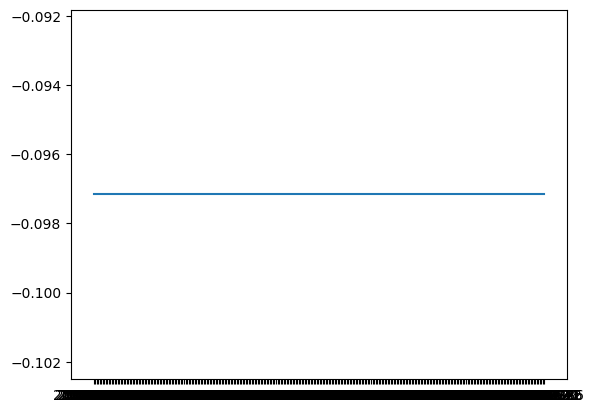

In [19]:
from sklearn.metrics import mean_squared_error
melhor = models[2][1]
melhor.fit(X_train[:400], y_train[:400].ravel())

teste = melhor.predict(X_test)

df_train = pd.read_csv("../data/test.csv")


teste = melhor.predict(df_train.drop(["DT_COMPTC"],axis=1))



# print(melhor.score(X_test, y_test))


plt.plot(df_train["DT_COMPTC"], teste)
plt.show()